# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
cities_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        
    #print(json.dumps(city_weather_json, indent=4, sort_keys=True)) # see how things are organized
        
    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['city']['coord']['lat']
        city_lng = city_weather_json['city']['coord']['lon']
    # List of Max Temps   
        list_of_max_temps = [item['main']['temp_max'] for item in city_weather_json['list']] 
        
    # max value of list   
        city_max_temp = np.max(list_of_max_temps) 
        city_max_temp_celsius = round(city_max_temp - 273.15, 2) # convert to celsius
        index_of_hottest_day = list_of_max_temps.index(city_max_temp) # get index from list
        city_humidity = city_weather_json['list'][index_of_hottest_day]['main']['humidity'] # use index for other queries
        city_clouds = city_weather_json['list'][index_of_hottest_day]['clouds']['all']
        city_wind = city_weather_json['list'][index_of_hottest_day]['wind']['speed']
        city_country = city_weather_json['city']['country']
        city_date = city_weather_json['list'][index_of_hottest_day]['dt'] 

        # Append the City information into city_data list
        cities_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp_celsius,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        continue

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | taman rajawali
City not found. Skipping...
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | kununurra
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | laojunmiao
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kavaratti
Processing Record 10 of Set 1 | sapucaia
Processing Record 11 of Set 1 | nova sintra
Processing Record 12 of Set 1 | lundazi
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | yuzhno-kurilsk
Processing Record 15 of Set 1 | bel ombre
Processing Record 16 of Set 1 | parabel'
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | camiri
Processing Record 19 of Set 1 | altar
Processing Record 20 of Set 1 | nola
Processing Record 21 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Re

Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | fort st. john
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | champerico
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | lihue
Processing Record 47 of Set 4 | lishui
Processing Record 48 of Set 4 | kardla
Processing Record 49 of Set 4 | puerto carreno
Processing Record 0 of Set 5 | palmer
Processing Record 1 of Set 5 | minas de marcona
Processing Record 2 of Set 5 | arcachon
Processing Record 3 of Set 5 | dudinka
Processing Record 4 of Set 5 | wynyard
Processing Record 5 of Set 5 | santa cruz
Processing Record 6 of Set 5 | mokolo
Processing Record 7 of Set 5 | tolanaro
Processing Record 8 of Set 5 | fort bragg
Processing Record 9 of Set 5 | mangaratiba
Processing Record 10 of Set 5 | kanniyakumari
Processing Record 11 of Set 5 | new norfolk
Processing Record 12 of Set 5 | ad dawadimi
Processing Record 13 of Set 5 | weno
Processing Record 14 of Set 5 | afaahiti
P

Processing Record 35 of Set 8 | kuanda
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | istgah-e rah ahan-e garmsar
Processing Record 38 of Set 8 | edremit
Processing Record 39 of Set 8 | betong
Processing Record 40 of Set 8 | dorado
Processing Record 41 of Set 8 | yangor
City not found. Skipping...
Processing Record 42 of Set 8 | tralee
Processing Record 43 of Set 8 | tangalle
Processing Record 44 of Set 8 | nizhnesortymskiy
Processing Record 45 of Set 8 | fuglafjordur
Processing Record 46 of Set 8 | nadym
Processing Record 47 of Set 8 | geraldton
Processing Record 48 of Set 8 | svetlogorsk
Processing Record 49 of Set 8 | nantucket
Processing Record 0 of Set 9 | kedrovyy
Processing Record 1 of Set 9 | okha
Processing Record 2 of Set 9 | yorkton
Processing Record 3 of Set 9 | gadzhiyevo
Processing Record 4 of Set 9 | ceeldheer
Processing Record 5 of Set 9 | coquimbo
Processing Record 6 of Set 9 | petrosani
Processing Record 7 of Set 9 | elliot lake
Process

Processing Record 24 of Set 12 | were ilu
Processing Record 25 of Set 12 | nuuk
Processing Record 26 of Set 12 | margate
Processing Record 27 of Set 12 | vadso
Processing Record 28 of Set 12 | longboat key
Processing Record 29 of Set 12 | nagqu
Processing Record 30 of Set 12 | cable beach
City not found. Skipping...
Processing Record 31 of Set 12 | booue
Processing Record 32 of Set 12 | abu zabad
Processing Record 33 of Set 12 | kyren
Processing Record 34 of Set 12 | gustavsberg
Processing Record 35 of Set 12 | karratha
Processing Record 36 of Set 12 | changchun
Processing Record 37 of Set 12 | uren'
Processing Record 38 of Set 12 | greymouth
Processing Record 39 of Set 12 | bovalino
Processing Record 40 of Set 12 | kamina
Processing Record 41 of Set 12 | maragogi
Processing Record 42 of Set 12 | qamdo
Processing Record 43 of Set 12 | howard springs
Processing Record 44 of Set 12 | nizhneangarsk
Processing Record 45 of Set 12 | beidao
Processing Record 46 of Set 12 | mar del plata
Proc

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
cities_data_df = pd.DataFrame(cities_data)

print(cities_data_df)

# Show Record Count
cities_data_df.count()

In [5]:
# Display sample data
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,5.16,87,100,6.35,GS,1691798400
1,ilulissat,69.2167,-51.1000,7.90,64,100,1.84,GL,1691852400
2,port-aux-francais,-49.3500,70.2167,6.43,92,100,19.43,TF,1692025200
3,kununurra,-15.7667,128.7333,34.64,17,24,4.22,AU,1692079200
4,thompson,55.7435,-97.8558,22.47,37,96,1.44,CA,1691863200


In [6]:
# Export the City_Data into a csv
cities_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
cities_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
cities_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.16,87,100,6.35,GS,1691798400
1,ilulissat,69.2167,-51.1000,7.90,64,100,1.84,GL,1691852400
2,port-aux-francais,-49.3500,70.2167,6.43,92,100,19.43,TF,1692025200
3,kununurra,-15.7667,128.7333,34.64,17,24,4.22,AU,1692079200
4,thompson,55.7435,-97.8558,22.47,37,96,1.44,CA,1691863200
5,laojunmiao,39.8333,97.7333,30.77,18,91,6.64,CN,1691830800
6,waitangi,-43.9535,-176.5597,12.18,94,100,5.89,NZ,1692068400
7,kavaratti,10.5669,72.6420,28.27,73,100,4.82,IN,1691809200
8,sapucaia,-29.8333,-51.1500,25.45,64,100,3.22,BR,1691776800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

City_ID
0     -54.2811
1      69.2167
2     -49.3500
3     -15.7667
4      55.7435
        ...   
583    39.9000
584    50.0979
585    26.1167
586    41.7407
587   -35.3500
Name: Lat, Length: 588, dtype: float64
City_ID
0       5.16
1       7.90
2       6.43
3      34.64
4      22.47
       ...  
583    32.29
584    26.98
585    36.27
586    31.94
587    16.98
Name: Max Temp, Length: 588, dtype: float64


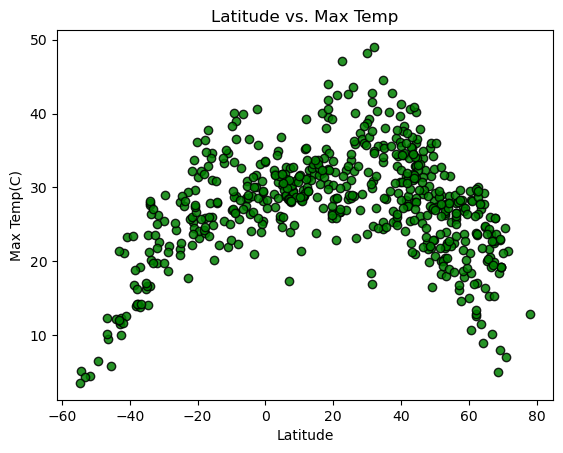

<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis_scatter = cities_data_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_temp = cities_data_df['Max Temp']
print(y_axis_scatter_temp)

plt.scatter(x_axis_scatter, y_axis_scatter_temp, marker="o", facecolors="green", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties

plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Max Temp")
plt.show()

# Save the figure
plt.savefig("Output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

City_ID
0     -54.2811
1      69.2167
2     -49.3500
3     -15.7667
4      55.7435
        ...   
583    39.9000
584    50.0979
585    26.1167
586    41.7407
587   -35.3500
Name: Lat, Length: 588, dtype: float64
City_ID
0      87
1      64
2      92
3      17
4      37
       ..
583    59
584    39
585    40
586    52
587    41
Name: Humidity, Length: 588, dtype: int64


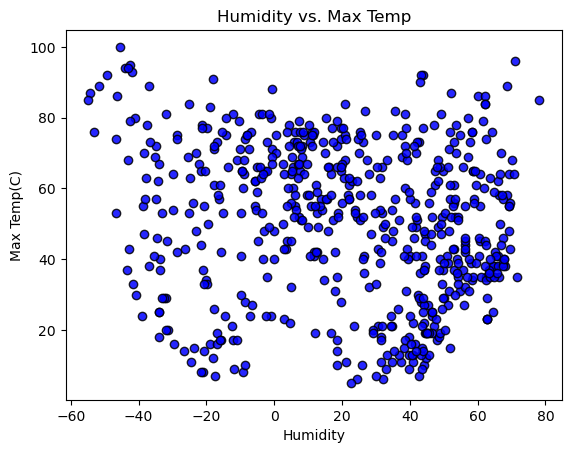

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis_scatter = cities_data_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_humid = cities_data_df['Humidity']
print(y_axis_scatter_humid)

plt.scatter(x_axis_scatter, y_axis_scatter_humid, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Max Temp(C)')
plt.xlabel('Humidity')
plt.title("Humidity vs. Max Temp")
plt.show()

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

City_ID
0     -54.2811
1      69.2167
2     -49.3500
3     -15.7667
4      55.7435
        ...   
583    39.9000
584    50.0979
585    26.1167
586    41.7407
587   -35.3500
Name: Lat, Length: 588, dtype: float64
City_ID
0      100
1      100
2      100
3       24
4       96
      ... 
583     71
584     11
585     60
586     27
587    100
Name: Cloudiness, Length: 588, dtype: int64


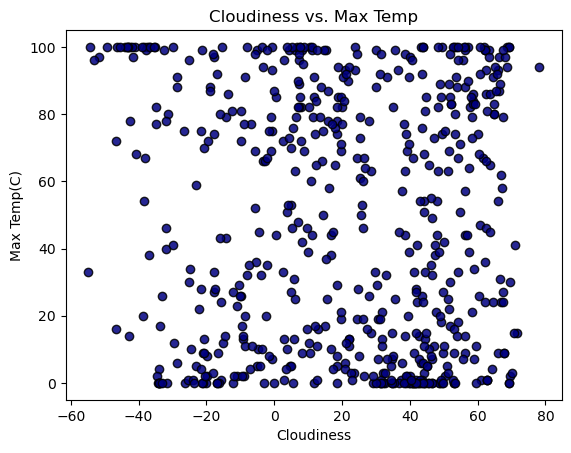

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_scatter = cities_data_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_cloudy = cities_data_df['Cloudiness']
print(y_axis_scatter_cloudy)

plt.scatter(x_axis_scatter, y_axis_scatter_cloudy, marker="o", facecolors="navy", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Max Temp(C)')
plt.xlabel('Cloudiness')
plt.title("Cloudiness vs. Max Temp")
plt.show()

# Save the figure
plt.savefig("Output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

City_ID
0     -54.2811
1      69.2167
2     -49.3500
3     -15.7667
4      55.7435
        ...   
583    39.9000
584    50.0979
585    26.1167
586    41.7407
587   -35.3500
Name: Lat, Length: 588, dtype: float64
City_ID
0       6.35
1       1.84
2      19.43
3       4.22
4       1.44
       ...  
583    11.82
584     1.40
585     5.19
586     6.43
587     1.24
Name: Wind Speed, Length: 588, dtype: float64


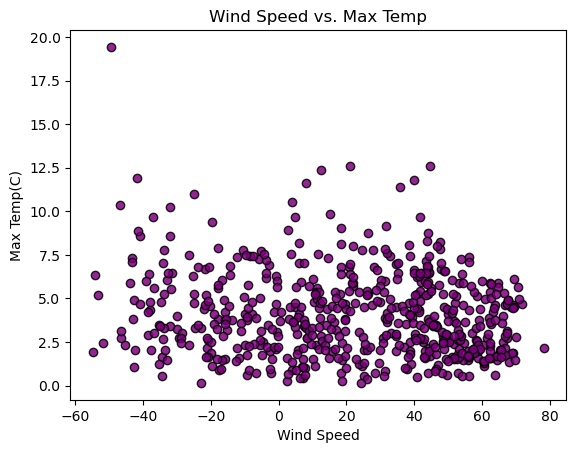

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_axis_scatter = cities_data_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_wind = cities_data_df['Wind Speed']
print(y_axis_scatter_wind)

plt.scatter(x_axis_scatter, y_axis_scatter_wind, marker="o", facecolors="purple", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Max Temp(C)')
plt.xlabel('Wind Speed')
plt.title("Wind Speed vs. Max Temp")
plt.show()

# Save the figure
plt.savefig("Output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


y = 0.02x + 27.05


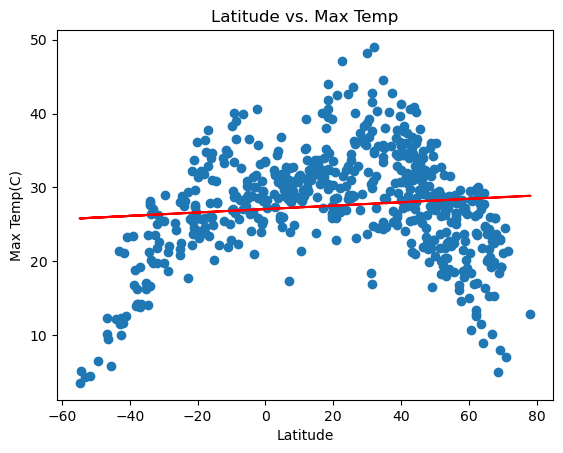

In [15]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_temp)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_axis_scatter,y_axis_scatter_temp)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Max Temp")
plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = cities_data_df.loc[(cities_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ilulissat,69.2167,-51.1000,7.90,64,100,1.84,GL,1691852400
4,thompson,55.7435,-97.8558,22.47,37,96,1.44,CA,1691863200
5,laojunmiao,39.8333,97.7333,30.77,18,91,6.64,CN,1691830800
7,kavaratti,10.5669,72.6420,28.27,73,100,4.82,IN,1691809200
9,nova sintra,14.8667,-24.7167,23.84,70,17,1.58,CV,1691960400
11,albany,42.6001,-73.9662,25.44,73,14,2.49,US,1691938800
12,yuzhno-kurilsk,44.0306,145.8556,20.92,92,100,3.79,RU,1691712000
14,parabel',58.6978,81.4825,17.82,65,84,1.56,RU,1692014400
17,altar,30.7000,-111.8167,39.30,21,7,2.75,MX,1692057600


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = cities_data_df.loc[(cities_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,5.16,87,100,6.35,GS,1691798400
2,port-aux-francais,-49.3500,70.2167,6.43,92,100,19.43,TF,1692025200
3,kununurra,-15.7667,128.7333,34.64,17,24,4.22,AU,1692079200
6,waitangi,-43.9535,-176.5597,12.18,94,100,5.89,NZ,1692068400
8,sapucaia,-29.8333,-51.1500,25.45,64,100,3.22,BR,1691776800
10,lundazi,-12.2929,33.1782,33.30,17,0,2.16,ZM,1692100800
13,bel ombre,-4.6167,55.4167,26.35,81,45,2.49,SC,1691690400
15,avarua,-21.2078,-159.7750,25.28,78,99,2.13,CK,1691884800
16,camiri,-20.0500,-63.5167,36.10,34,0,1.88,BO,1691690400


###  Temperature vs. Latitude Linear Regression Plot

City_ID
1      69.2167
4      55.7435
5      39.8333
7      10.5669
9      14.8667
        ...   
581    29.1268
583    39.9000
584    50.0979
585    26.1167
586    41.7407
Name: Lat, Length: 425, dtype: float64
City_ID
1       7.90
4      22.47
5      30.77
7      28.27
9      23.84
       ...  
581    38.29
583    32.29
584    26.98
585    36.27
586    31.94
Name: Max Temp, Length: 425, dtype: float64
y = -0.16x + 34.67
The r value is: -0.4734060024387327


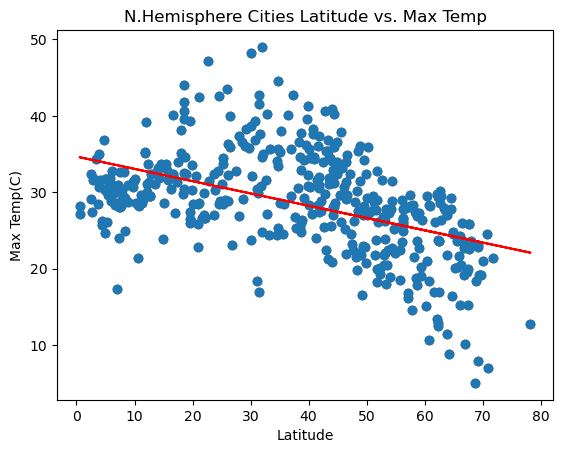

In [18]:
# Linear regression on Northern Hemisphere
x_axis_scatter = northern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_maxtemp = northern_hemisphere_df['Max Temp']
print(y_axis_scatter_maxtemp)

plt.scatter(x_axis_scatter, y_axis_scatter_maxtemp, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_maxtemp)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_maxtemp)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("N.Hemisphere Cities Latitude vs. Max Temp")

# Save the figure
plt.savefig("Output/Fig4.png")

plt.show()

City_ID
0     -54.2811
2     -49.3500
3     -15.7667
6     -43.9535
8     -29.8333
        ...   
571    -9.0122
573   -12.4970
576   -38.0023
582   -36.7167
587   -35.3500
Name: Lat, Length: 163, dtype: float64
City_ID
0       5.16
2       6.43
3      34.64
6      12.18
8      25.45
       ...  
571    26.54
573    33.96
576    16.17
582    14.18
587    16.98
Name: Max Temp, Length: 163, dtype: float64
y = 0.42x + 33.75
The r value is: 0.7726953721792149


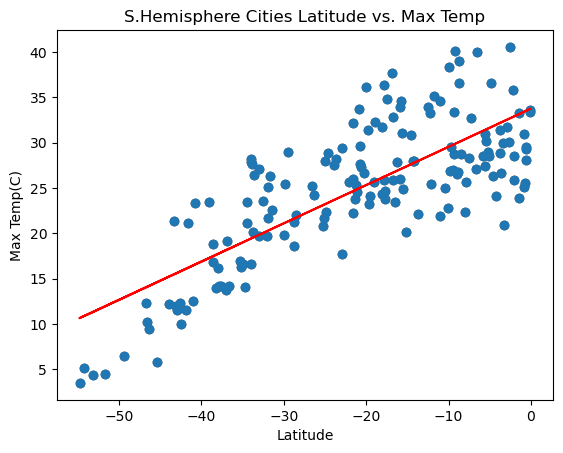

In [19]:
# Linear regression on Southern Hemisphere
x_axis_scatter = southern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_maxtemp = southern_hemisphere_df['Max Temp']
print(y_axis_scatter_maxtemp)

plt.scatter(x_axis_scatter, y_axis_scatter_maxtemp, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_maxtemp)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_maxtemp)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("S.Hemisphere Cities Latitude vs. Max Temp")

# Save the figure
plt.savefig("Output/Fig5.png")

plt.show()

**Discussion about the linear relationship:** There are a couple of regressions for the opposite regression paths of the temperature and latitude analysis, but two mainly come to mind. The planet rotates at an angle around the Sun, leaning 23.5° from its axis. This tilt is what gives us the seasons and orients the Northern and Southern Hemispheres in opposite directions as noted in the opposite directions of the regression plot. 

### Humidity vs. Latitude Linear Regression Plot

City_ID
1      69.2167
4      55.7435
5      39.8333
7      10.5669
9      14.8667
        ...   
581    29.1268
583    39.9000
584    50.0979
585    26.1167
586    41.7407
Name: Lat, Length: 425, dtype: float64
City_ID
1      64
4      37
5      18
7      73
9      70
       ..
581    19
583    59
584    39
585    40
586    52
Name: Humidity, Length: 425, dtype: int64
y = -0.17x + 55.46
The r value is: -0.16455640952309966


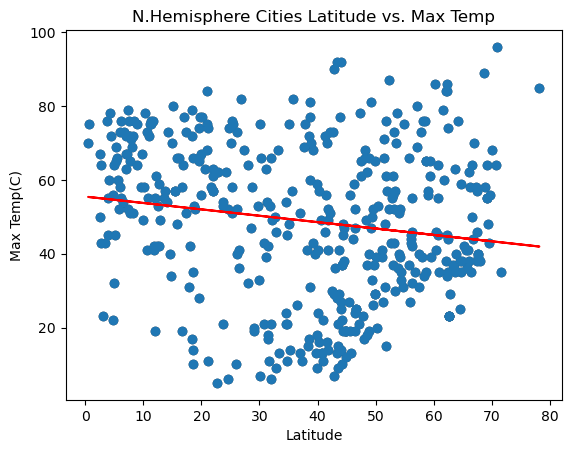

In [20]:
# Northern Hemisphere
x_axis_scatter = northern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_humid = northern_hemisphere_df['Humidity']
print(y_axis_scatter_humid)

plt.scatter(x_axis_scatter, y_axis_scatter_humid, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_humid)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_humid)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("N.Hemisphere Cities Latitude vs. Max Temp")

# Save the figure
plt.savefig("Output/Fig6.png")

plt.show()

City_ID
0     -54.2811
2     -49.3500
3     -15.7667
6     -43.9535
8     -29.8333
        ...   
571    -9.0122
573   -12.4970
576   -38.0023
582   -36.7167
587   -35.3500
Name: Lat, Length: 163, dtype: float64
City_ID
0      87
2      92
3      17
6      94
8      64
       ..
571    68
573    21
576    57
582    73
587    41
Name: Humidity, Length: 163, dtype: int64
y = -0.23x + 48.92
The r value is: -0.13658332386218755


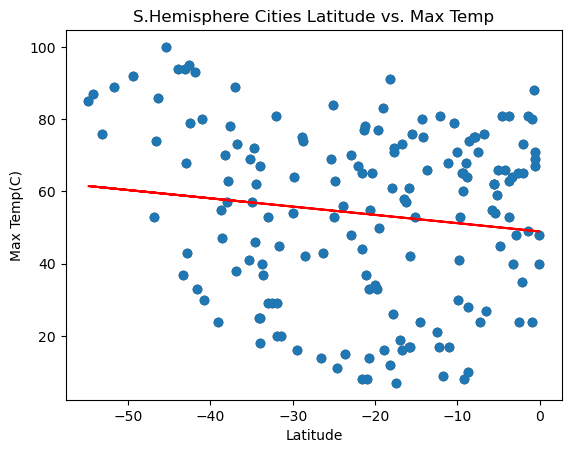

In [21]:
# Southern Hemisphere
x_axis_scatter = southern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_humid = southern_hemisphere_df['Humidity']
print(y_axis_scatter_humid)

plt.scatter(x_axis_scatter, y_axis_scatter_humid, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_humid)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_humid)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("S.Hemisphere Cities Latitude vs. Max Temp")

# Save the figure
plt.savefig("Output/Fig7.png")

plt.show()

**Discussion about the linear relationship:** Larger land masses combined with larger population centers and cities yields higher concentration of humidity in the Northern Hemisphere with more sparing humidity in the South. There is notable similarlity in the regression output but both are similar in overall r squared value. The higher concentration  in Northern Hemisphere is based on the most cities within same temperature and "temperate-like" environment, optimal for human living. 

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
1      69.2167
4      55.7435
5      39.8333
7      10.5669
9      14.8667
        ...   
581    29.1268
583    39.9000
584    50.0979
585    26.1167
586    41.7407
Name: Lat, Length: 425, dtype: float64
City_ID
1      100
4       96
5       91
7      100
9       17
      ... 
581      2
583     71
584     11
585     60
586     27
Name: Cloudiness, Length: 425, dtype: int64
y = -0.05x + 49.05
The r value is: -0.026687354015210777


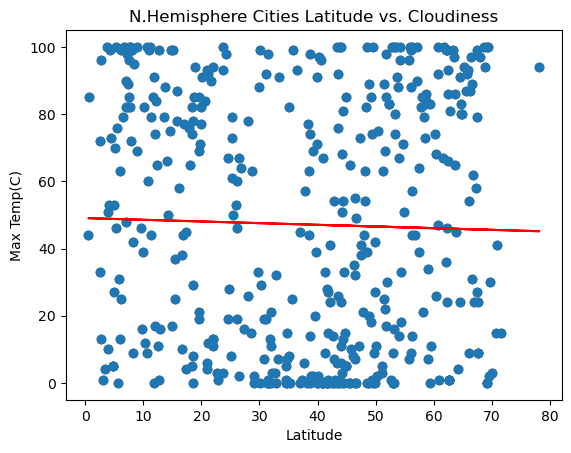

In [22]:
# Northern Hemisphere
x_axis_scatter = northern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_cloudy = northern_hemisphere_df['Cloudiness']
print(y_axis_scatter_cloudy)

plt.scatter(x_axis_scatter, y_axis_scatter_cloudy, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_cloudy)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_cloudy)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Latitude')
plt.title("N.Hemisphere Cities Latitude vs. Cloudiness")

# Save the figure
plt.savefig("Output/Fig8.png")

plt.show()

City_ID
0     -54.2811
2     -49.3500
3     -15.7667
6     -43.9535
8     -29.8333
        ...   
571    -9.0122
573   -12.4970
576   -38.0023
582   -36.7167
587   -35.3500
Name: Lat, Length: 163, dtype: float64
City_ID
0      100
2      100
3       24
6      100
8      100
      ... 
571     77
573     81
576     67
582    100
587    100
Name: Cloudiness, Length: 163, dtype: int64
y = -0.63x + 34.83
The r value is: -0.2308401664658355


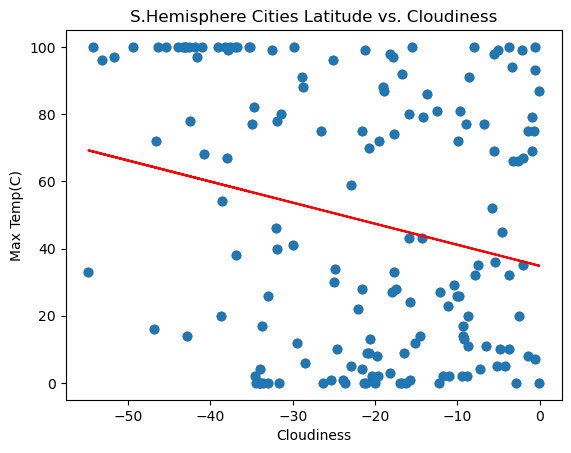

In [23]:
# Southern Hemisphere
x_axis_scatter = southern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_cloudy = southern_hemisphere_df['Cloudiness']
print(y_axis_scatter_cloudy)

plt.scatter(x_axis_scatter, y_axis_scatter_cloudy, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_cloudy)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_cloudy)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Cloudiness')
plt.title("S.Hemisphere Cities Latitude vs. Cloudiness")

# Save the figure
plt.savefig("Output/Fig9.png")

plt.show()

**Discussion about the linear relationship:** Less landmass and populace in the Southern Hemisphere plus the higher cloudiness in Tropics and in Antarctica yields higher concentrations at high and low cloudiness by temperature. This leads to more dramatic r squared as opposed to the more even Northern regression with larger land masses and more even distribution of cloudiness across the hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
1      69.2167
4      55.7435
5      39.8333
7      10.5669
9      14.8667
        ...   
581    29.1268
583    39.9000
584    50.0979
585    26.1167
586    41.7407
Name: Lat, Length: 425, dtype: float64
City_ID
1       1.84
4       1.44
5       6.64
7       4.82
9       1.58
       ...  
581     4.85
583    11.82
584     1.40
585     5.19
586     6.43
Name: Wind Speed, Length: 425, dtype: float64
y = -0.01x + 4.42
The r value is: -0.11339127208614287


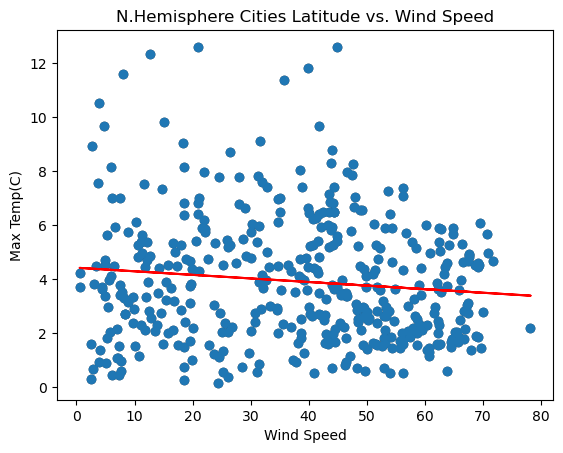

In [24]:
# Northern Hemisphere
x_axis_scatter = northern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_wind = northern_hemisphere_df['Wind Speed']
print(y_axis_scatter_wind)

plt.scatter(x_axis_scatter, y_axis_scatter_wind, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_wind)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_wind)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Wind Speed')
plt.title("N.Hemisphere Cities Latitude vs. Wind Speed")

# Save the figure
plt.savefig("Output/Fig10.png")

plt.show()

City_ID
0     -54.2811
2     -49.3500
3     -15.7667
6     -43.9535
8     -29.8333
        ...   
571    -9.0122
573   -12.4970
576   -38.0023
582   -36.7167
587   -35.3500
Name: Lat, Length: 163, dtype: float64
City_ID
0       6.35
2      19.43
3       4.22
6       5.89
8       3.22
       ...  
571     5.75
573     1.39
576     4.81
582     3.03
587     1.24
Name: Wind Speed, Length: 163, dtype: float64
y = -0.04x + 3.53
The r value is: -0.20739995785605575


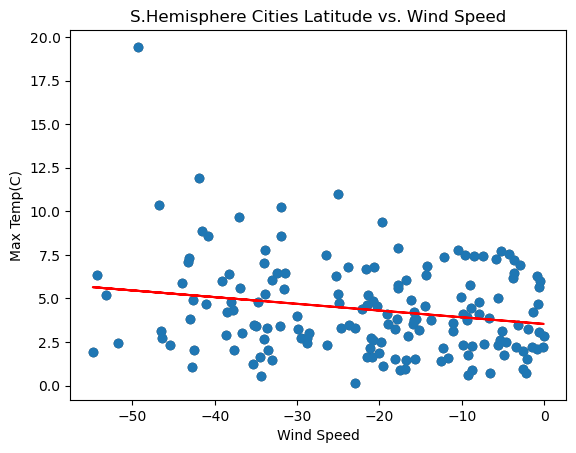

In [25]:
# Southern Hemisphere
x_axis_scatter = southern_hemisphere_df["Lat"]
print(x_axis_scatter)
y_axis_scatter_wind = southern_hemisphere_df['Wind Speed']
print(y_axis_scatter_wind)

plt.scatter(x_axis_scatter, y_axis_scatter_wind, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.75)

# Linear regression definition

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter_wind)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print("The r value is:", rvalue)

plt.scatter(x_axis_scatter,y_axis_scatter_wind)
plt.plot(x_axis_scatter,regress_values,"r-")
plt.ylabel('Max Temp(C)')
plt.xlabel('Wind Speed')
plt.title("S.Hemisphere Cities Latitude vs. Wind Speed")

# Save the figure
plt.savefig("Output/Fig11.png")

plt.show()

**Discussion about the linear relationship:** Generally speaking, the higher the temmperature the higher the average wind speed. The same factors of land mass in the North and large bodies of water in the South as well as temperature gradiants and thermal circulations lead to a consistent negative regression r squared in both hemispheres as both systems act similar. Different but same wind patterns exist in both hemispheres 